# Day 18

## Part 1

Thanks to your efforts, the machine parts factory is one of the first factories up and running since the lavafall came back. However, to catch up with the large backlog of parts requests, the factory will also need a large supply of lava for a while; the Elves have already started creating a large lagoon nearby for this purpose.

However, they aren't sure the lagoon will be big enough; they've asked you to take a look at the dig plan (your puzzle input). For example:

```
R 6 (#70c710)
D 5 (#0dc571)
L 2 (#5713f0)
D 2 (#d2c081)
R 2 (#59c680)
D 2 (#411b91)
L 5 (#8ceee2)
U 2 (#caa173)
L 1 (#1b58a2)
U 2 (#caa171)
R 2 (#7807d2)
U 3 (#a77fa3)
L 2 (#015232)
U 2 (#7a21e3)
```
The digger starts in a 1 meter cube hole in the ground. They then dig the specified number of meters up (U), down (D), left (L), or right (R), clearing full 1 meter cubes as they go. The directions are given as seen from above, so if "up" were north, then "right" would be east, and so on. Each trench is also listed with the color that the edge of the trench should be painted as an RGB hexadecimal color code.

When viewed from above, the above example dig plan would result in the following loop of trench (#) having been dug out from otherwise ground-level terrain (.):

```
#######
#.....#
###...#
..#...#
..#...#
###.###
#...#..
##..###
.#....#
.######
```
At this point, the trench could contain 38 cubic meters of lava. However, this is just the edge of the lagoon; the next step is to dig out the interior so that it is one meter deep as well:

```
#######
#######
#######
..#####
..#####
#######
#####..
#######
.######
.######
```
Now, the lagoon can contain a much more respectable 62 cubic meters of lava. While the interior is dug out, the edges are also painted according to the color codes in the dig plan.

The Elves are concerned the lagoon won't be large enough; if they follow their dig plan, how many cubic meters of lava could it hold?

digging R 6
digging D 5
digging L 2
digging D 2
digging R 2
digging D 2
digging L 5
digging U 2
digging L 1
digging U 2
digging R 2
digging U 3
digging L 2
digging U 2


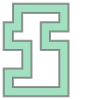

In [43]:
from shapely import Polygon, MultiPolygon


def create_dig_block(x, y) -> Polygon:
    # create a 1x1 block centered at x, y
    offset = 0.5
    return Polygon(
        [
            (x - offset, y - offset),
            (x + offset, y - offset),
            (x + offset, y + offset),
            (x - offset, y + offset),
        ]
    )


def dig_blocks(input: str) -> int:
    start_position = (0, 0)
    blocks = []
    for line in input.splitlines():
        start_dig_block = create_dig_block(*start_position)

        direction, distance, color = line.split()
        distance = int(distance)

        print(f"digging {direction} {distance}")
        if direction == "R":
            new_position = (start_position[0] + distance, start_position[1])
        elif direction == "L":
            new_position = (start_position[0] - distance, start_position[1])
        elif direction == "U":
            new_position = (start_position[0], start_position[1] - distance)
        elif direction == "D":
            new_position = (start_position[0], start_position[1] + distance)
        new_dig_block = create_dig_block(*new_position)

        # combine start_position and new_position into a rectangle
        multi_poly = MultiPolygon([start_dig_block, new_dig_block])
        bounding_box = multi_poly.bounds
        bbox_poly = Polygon(
            [
                (bounding_box[0], bounding_box[1]),
                (bounding_box[0], bounding_box[3]),
                (bounding_box[2], bounding_box[3]),
                (bounding_box[2], bounding_box[1]),
            ]
        )
        blocks.append(bbox_poly)
        start_position = new_position

    # combine all blocks into one (multi)polygon
    all_blocks = blocks[0]
    for block in blocks[1:]:
        all_blocks = all_blocks.union(block)
    return all_blocks


test_input = """
R 6 (#70c710)
D 5 (#0dc571)
L 2 (#5713f0)
D 2 (#d2c081)
R 2 (#59c680)
D 2 (#411b91)
L 5 (#8ceee2)
U 2 (#caa173)
L 1 (#1b58a2)
U 2 (#caa171)
R 2 (#7807d2)
U 3 (#a77fa3)
L 2 (#015232)
U 2 (#7a21e3)""".strip()

test_dig_poly = dig_blocks(test_input)
test_dig_poly

62.0


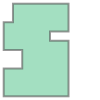

In [44]:
filled_test_dig_poly = Polygon(test_dig_poly.exterior)
print(filled_test_dig_poly.area)
filled_test_dig_poly

digging L 6
digging U 8
digging L 3
digging U 5
digging L 9
digging U 8
digging L 7
digging D 9
digging L 10
digging D 4
digging L 4
digging U 5
digging L 7
digging U 8
digging L 10
digging U 8
digging L 2
digging U 7
digging R 6
digging U 9
digging R 2
digging U 5
digging L 8
digging U 6
digging L 3
digging U 7
digging R 4
digging U 6
digging R 8
digging U 7
digging R 9
digging U 4
digging R 2
digging U 7
digging R 3
digging D 9
digging R 7
digging D 9
digging R 4
digging U 8
digging R 5
digging U 10
digging L 8
digging U 4
digging L 3
digging U 5
digging L 10
digging U 2
digging L 4
digging U 5
digging L 3
digging D 5
digging L 11
digging U 2
digging L 3
digging U 5
digging L 3
digging U 11
digging L 7
digging D 11
digging L 7
digging U 6
digging L 7
digging D 10
digging R 5
digging D 10
digging R 6
digging D 10
digging R 6
digging D 7
digging L 3
digging D 3
digging L 8
digging D 5
digging L 3
digging D 3
digging L 3
digging D 7
digging L 12
digging U 5
digging L 8
digging U 5
diggi

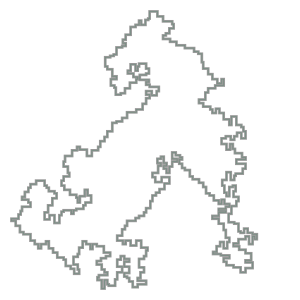

In [45]:
input_str = open("../inputs/18.txt").read()
dig_poly = dig_blocks(input_str)
dig_poly

53300.0


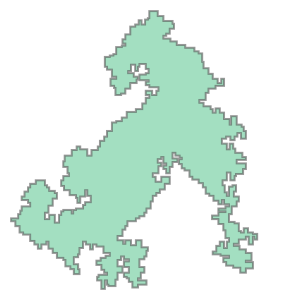

In [46]:
filled_dig_poly = Polygon(dig_poly.exterior)
print(filled_dig_poly.area)
filled_dig_poly

## Part 2

The Elves were right to be concerned; the planned lagoon would be much too small.

After a few minutes, someone realizes what happened; someone swapped the color and instruction parameters when producing the dig plan. They don't have time to fix the bug; one of them asks if you can extract the correct instructions from the hexadecimal codes.

Each hexadecimal code is six hexadecimal digits long. The first five hexadecimal digits encode the distance in meters as a five-digit hexadecimal number. The last hexadecimal digit encodes the direction to dig: 0 means R, 1 means D, 2 means L, and 3 means U.

So, in the above example, the hexadecimal codes can be converted into the true instructions:

```
#70c710 = R 461937
#0dc571 = D 56407
#5713f0 = R 356671
#d2c081 = D 863240
#59c680 = R 367720
#411b91 = D 266681
#8ceee2 = L 577262
#caa173 = U 829975
#1b58a2 = L 112010
#caa171 = D 829975
#7807d2 = L 491645
#a77fa3 = U 686074
#015232 = L 5411
#7a21e3 = U 500254
```
Digging out this loop and its interior produces a lagoon that can hold an impressive 952408144115 cubic meters of lava.

Convert the hexadecimal color codes into the correct instructions; if the Elves follow this new dig plan, how many cubic meters of lava could the lagoon hold?

digging R 461937
digging D 56407
digging R 356671
digging D 863240
digging R 367720
digging D 266681
digging L 577262
digging U 829975
digging L 112010
digging D 829975
digging L 491645
digging U 686074
digging L 5411
digging U 500254
952408144115.0


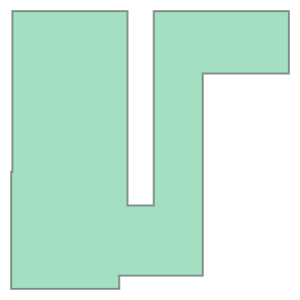

In [47]:
from shapely.geometry import MultiPolygon


def dig_blocks2(input: str) -> int:
    start_position = (0, 0)
    blocks = []
    for line in input.splitlines():
        start_dig_block = create_dig_block(*start_position)

        fake_direction, fake_distance, color = line.split()

        color_str = color.strip("()")[1:]  # remove the #
        # get the real distance and direction from the color string
        distance = int(color_str[:5], base=16)
        direction_conversion = {"0": "R", "1": "D", "2": "L", "3": "U"}
        direction = direction_conversion[color_str[5]]

        print(f"digging {direction} {distance}")
        if direction == "R":
            new_position = (start_position[0] + distance, start_position[1])
        elif direction == "L":
            new_position = (start_position[0] - distance, start_position[1])
        elif direction == "U":
            new_position = (start_position[0], start_position[1] - distance)
        elif direction == "D":
            new_position = (start_position[0], start_position[1] + distance)
        new_dig_block = create_dig_block(*new_position)

        # combine start_position and new_position into a rectangle
        multi_poly = MultiPolygon([start_dig_block, new_dig_block])
        bounding_box = multi_poly.bounds
        bbox_poly = Polygon(
            [
                (bounding_box[0], bounding_box[1]),
                (bounding_box[0], bounding_box[3]),
                (bounding_box[2], bounding_box[3]),
                (bounding_box[2], bounding_box[1]),
            ]
        )
        blocks.append(bbox_poly)
        start_position = new_position

    # combine all blocks into one (multi)polygon
    all_blocks = blocks[0]
    for block in blocks[1:]:
        all_blocks = all_blocks.union(block)
    return all_blocks


test_dig_poly2 = dig_blocks2(test_input)
filled_test_dig_poly2 = Polygon(test_dig_poly2.exterior)
print(filled_test_dig_poly2.area)
filled_test_dig_poly2

digging R 343788
digging U 12238
digging R 147432
digging U 70855
digging L 186701
digging U 336406
digging R 186701
digging U 202510
digging L 287109
digging U 111735
digging L 204111
digging U 75284
digging L 528514
digging U 107491
digging L 476029
digging U 248860
digging L 106272
digging U 96565
digging L 456384
digging U 338817
digging L 187793
digging D 127913
digging L 481656
digging U 127913
digging L 290612
digging U 307068
digging L 295221
digging D 196220
digging L 390593
digging U 196220
digging L 456412
digging U 276633
digging R 343090
digging U 257826
digging R 341057
digging D 257826
digging R 69518
digging U 108546
digging R 131824
digging U 154563
digging R 497483
digging U 246942
digging L 497483
digging U 167648
digging L 127256
digging U 153601
digging L 403647
digging U 417069
digging L 93448
digging U 149635
digging L 261138
digging U 29413
digging L 70861
digging U 75140
digging L 38386
digging U 403283
digging R 38386
digging U 201867
digging R 202698
digging 

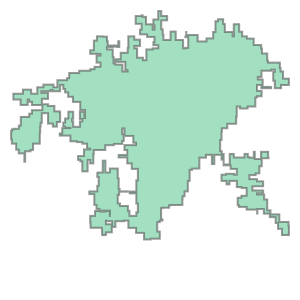

In [48]:
dig_poly2 = dig_blocks2(input_str)
filled_dig_poly2 = Polygon(dig_poly2.exterior)
print(filled_dig_poly2.area)
filled_dig_poly2